In [18]:
import pandas as pd
import numpy as np
#AdmissionData = pd.read_csv('data.csv',sep=',',index_col = False)
#del AdmissionData['Serial No.']
#ran = np.random.rand(len(AdmissionData)) < 0.8
#train = AdmissionData[ran]
#val = AdmissionData[~ran]
#train = AdmissionData.sample(frac = 0.8)
#val = AdmissionData.loc[~AdmissionData.index.isin(train.index)]
#train.to_csv('UsedTrainingDataForAdmissionDs.csv',sep=',',index = False)
#val.to_csv('UsedValidationDataForAdmissionDs.csv',sep=',',index = False)
train = pd.read_csv('UsedTrainingDataForAdmissionDs.csv',sep=',',index_col = False)
val = pd.read_csv('UsedValidationDataForAdmissionDs.csv',sep=',',index_col = False)


def getCoefficients():
    targetColMatrix = train['Chance of Admit '].values
    tempTrain = train.loc[:,train.columns != 'Chance of Admit ']
    new_col = [1]*len(train)
    tempTrain.insert(loc=0, column='intercept', value=new_col)
    Xmatrix = tempTrain.values
    Xmatrix.shape
    temp1 = Xmatrix.T@Xmatrix
    temp2 = np.linalg.inv(temp1)
    coefficients = temp2 @Xmatrix.T @targetColMatrix
    return coefficients
def compute(GivenDataSet):
    coefficients = getCoefficients()
    GivenDataSet['predict'] = [0]*len(GivenDataSet)
    for index,row in GivenDataSet.iterrows():
        temp2 = ((row[:-2].values)@coefficients[1:])+coefficients[0]
        GivenDataSet.loc[int(index),'predict'] = temp2
    return GivenDataSet

GivenDataSet = val.copy()

#import sys
#filename = sys.argv[1]
#GivenDataSet = pd.read_csv(filename,sep=',',index_col = False)
#del GivenDataSet['Serial No.']
GivenDataSet = compute(GivenDataSet)
#GivenDataSet.head()

In [17]:
#AdmissionData

In [8]:
def calculateMSEandMAEandMPE(GivenDataSet):
    MSE = 0
    MAE = 0
    MPE = 0
    for index,row in GivenDataSet.iterrows():
        yPredict = GivenDataSet.at[int(index),'predict']
        yActual = GivenDataSet.at[int(index),'Chance of Admit ']
        MSE += (yActual-yPredict)**2
        MAE += abs(yActual-yPredict)
        MPE += ((yActual-yPredict)/yActual)
        
    MSE /= len(GivenDataSet)
    MAE /= len(GivenDataSet)
    MPE /= len(GivenDataSet) 
    
    print("MSE is "+str(MSE))
    print("MAE is "+str(MAE))
    print("MPE is "+str(MPE))
    

In [19]:
calculateMSEandMAEandMPE(GivenDataSet)

MSE is 0.003749656301983857
MAE is 0.04614857409316508
MPE is 0.002666876544993783


In [21]:
GivenDataSet.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ', 'predict'],
      dtype='object')

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')
[-1.25766124  0.00192578  0.00247036  0.00710004  0.00137218  0.0177399
  0.11608494  0.0305502 ]


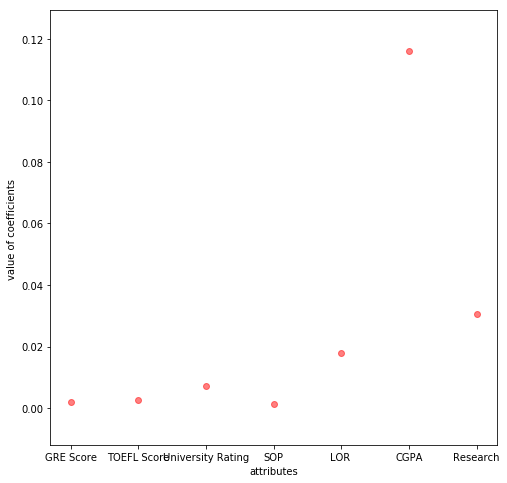

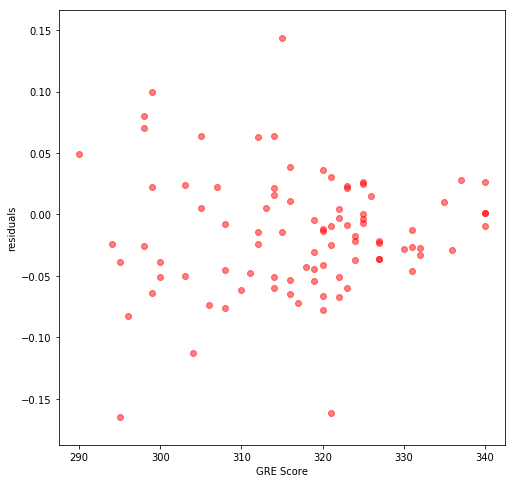

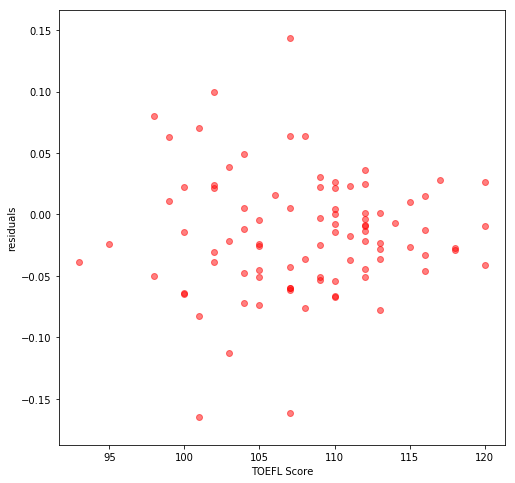

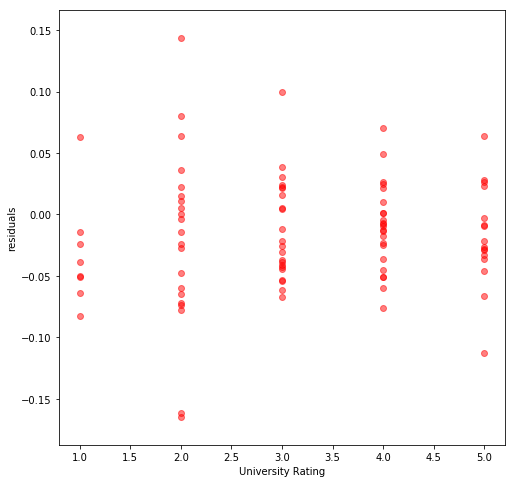

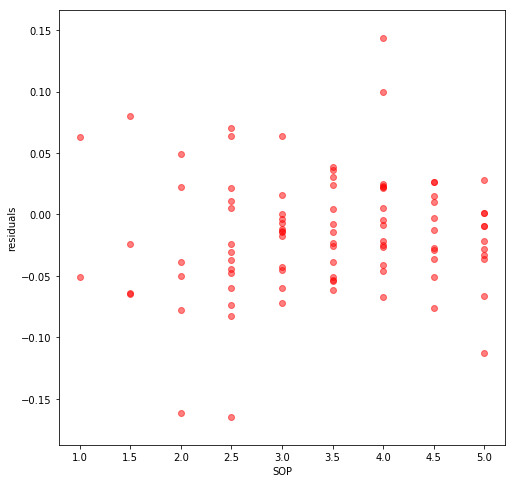

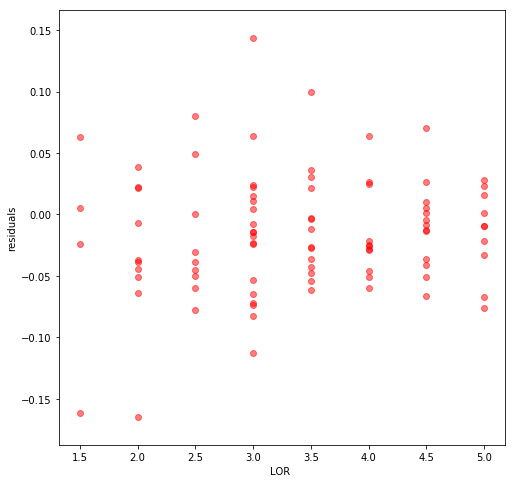

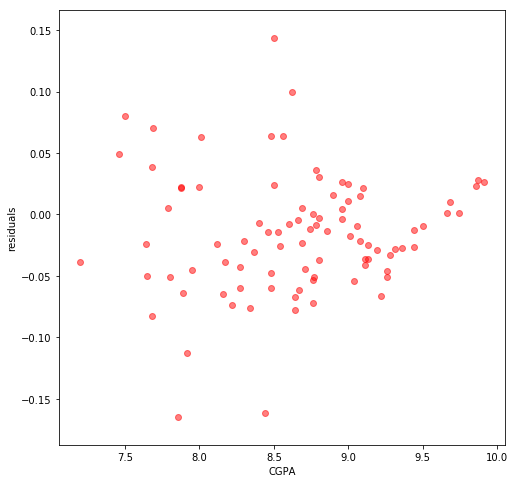

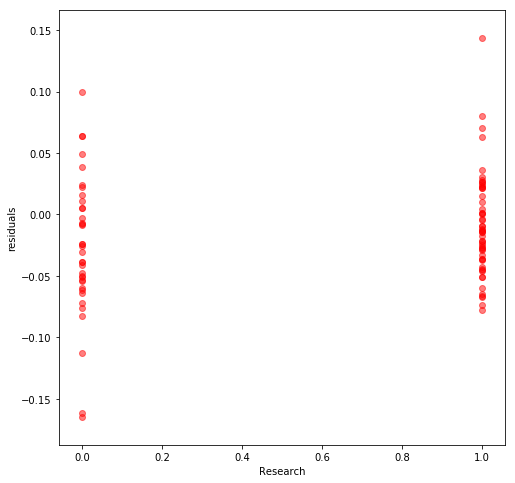

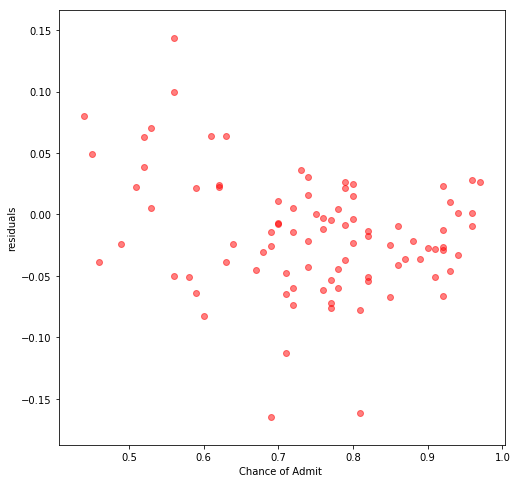

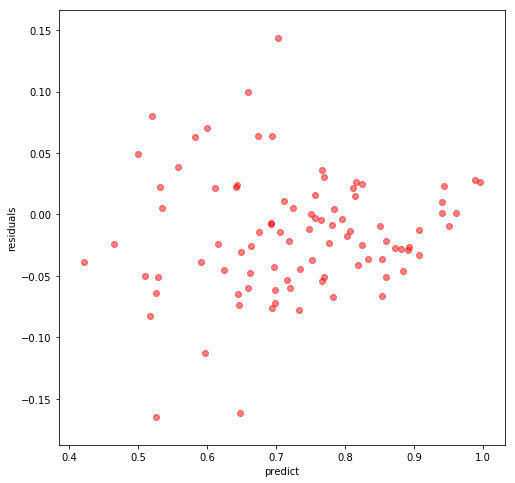

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
x = list(GivenDataSet['GRE Score'])
residuals = []
for index,row in GivenDataSet.iterrows():
    yPredict = GivenDataSet.at[int(index),'predict']
    yActual = GivenDataSet.at[int(index),'Chance of Admit ']
    residuals.append(yPredict-yActual)    
#y = list(data["satisfaction_level"])
#z = list(data["average_montly_hours"])
#label = list(data["left"])
#colors =[]
#for i in range(0,len(x)):
 #   if label[i] == 0:
#        colors.append("yellow")
 #   else:
#        colors.append("blue")
coefficients = getCoefficients()
x = GivenDataSet.columns[:-2]
print(x)
y = coefficients[1:]
print(coefficients)
fig = plt.figure(figsize=(8,8))
plt.scatter(x, y, color='red',alpha = 0.5)    
plt.xlabel('attributes')
plt.ylabel('value of coefficients ')
for i in GivenDataSet.columns:
    x=list(GivenDataSet[i])
    y=list(GivenDataSet['Chance of Admit '])
    z=list(GivenDataSet['predict'])
    m=list(GivenDataSet['predict'])
    
    fig = plt.figure(figsize=(8,8))
    #plt.scatter(x, y, color='green',alpha = 0.5)
    plt.scatter(x, residuals, color='red',alpha = 0.5)    
    plt.xlabel(i)
    plt.ylabel('residuals')
#plt.savefig('../output_data/pic1.png')
#plt.title('')


In [28]:
coefficients

array([-1.16228575,  0.00144747,  0.00273329,  0.00548228,  0.00341332,
        0.01671736,  0.11962174,  0.03540025])